
land_th: 0.6 water_th: 0.3 seed: 0 res: (150, 150)


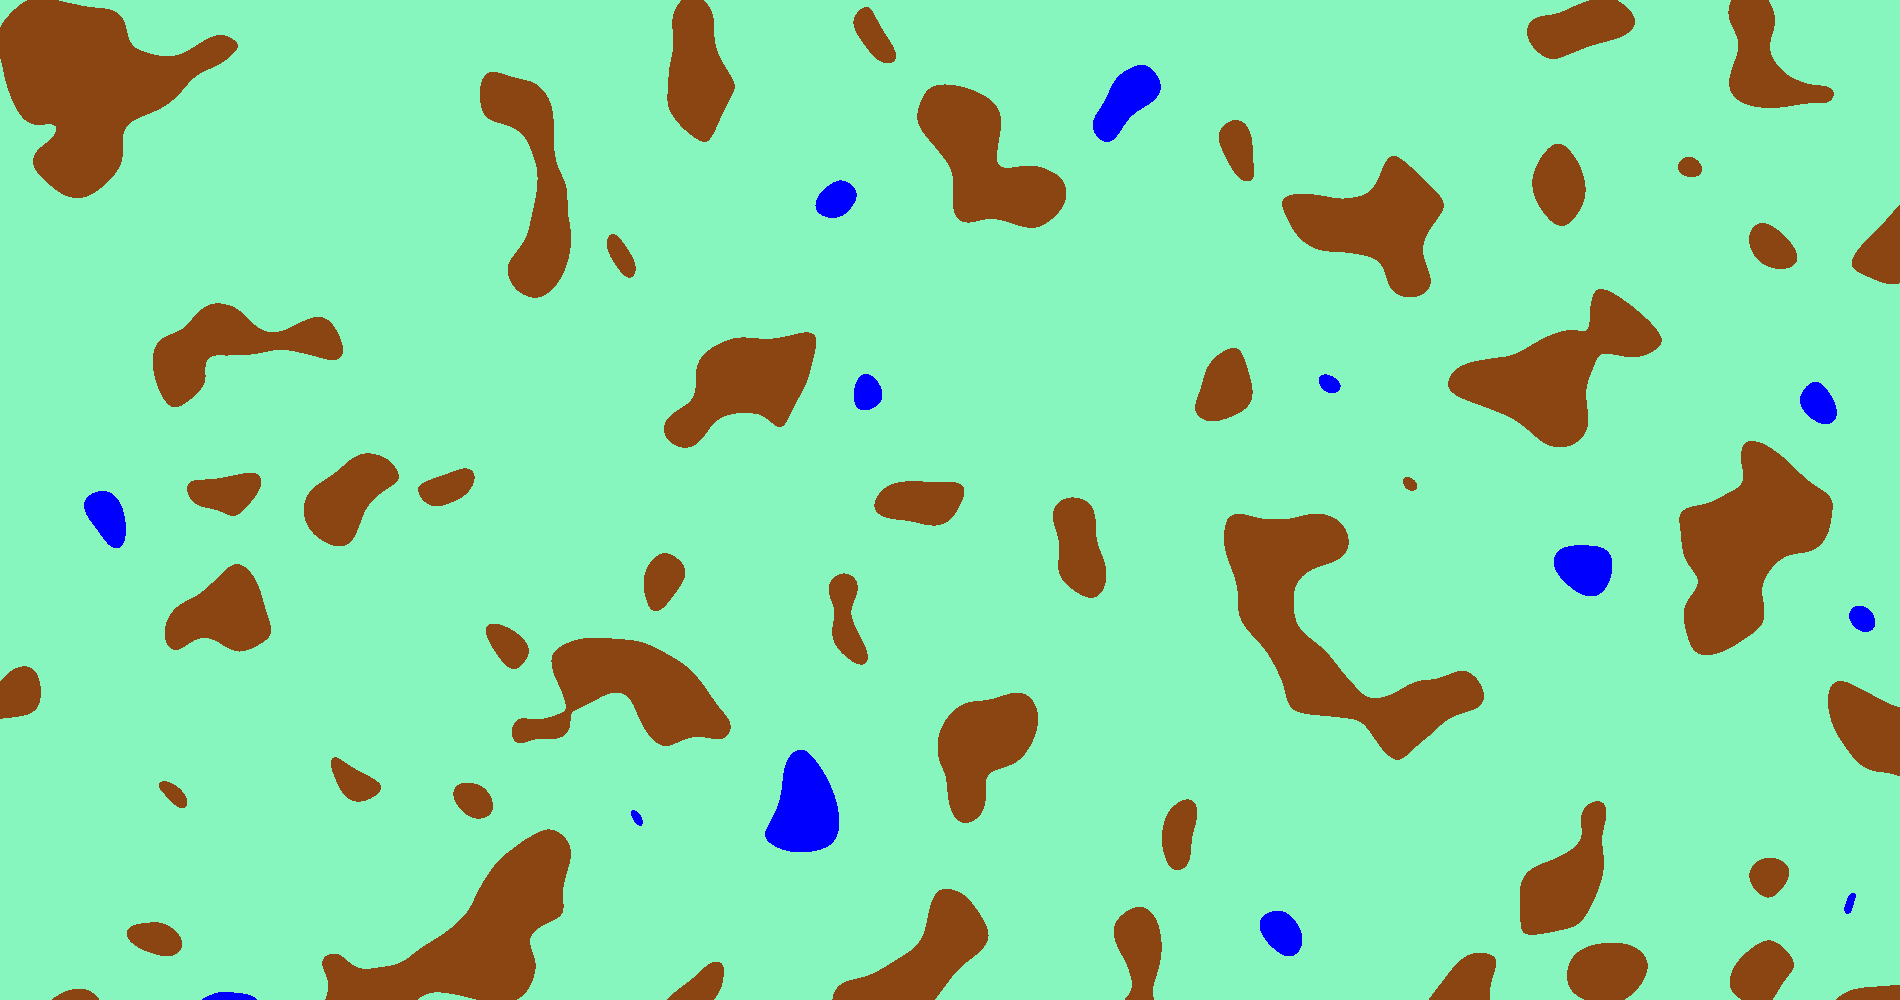

In [10]:
import noise
import numpy as np
from PIL import Image
from IPython.display import display

def generate_perlin_noise_2d(shape, res, seed=None):
    """
    Generates a 2D array filled with Perlin noise values.
    
    Parameters:
    - shape: A tuple containing dimensions (height, width) of the array.
    - res: A tuple specifying the Perlin noise resolutions for (y, x).
    - seed: An optional value to make the noise deterministic.
    
    Returns:
    A 2D array containing Perlin noise values.
    """
    cloud = np.zeros(shape)
    for y in range(shape[0]):
        for x in range(shape[1]):
            p_value = noise.pnoise2(y / res[0], x / res[1], octaves=2, repeatx=1024, repeaty=1024, base=seed if seed else 42)
            cloud[y][x] = (p_value + 1) / 2
    return cloud

def categorize_terrain(world_array, land_th=0.3, water_th=0.7):
    """
    Categorizes the terrain based on Perlin noise values.
    
    Parameters:
    - world_array: 2D array containing Perlin noise values.
    
    Returns:
    A 2D array containing categorized terrain types.
    """
    terrain = np.zeros_like(world_array, dtype=np.object_)

    for y in range(world_array.shape[0]):
        for x in range(world_array.shape[1]):
            if 0 <= world_array[y][x] < water_th:
                terrain[y][x] = 0
            elif water_th <= world_array[y][x] < land_th:
                terrain[y][x] = 1
            else:
                terrain[y][x] = 2

    return terrain

def visualize_terrain(terrain_array):
    """
    Produces an image based on the categorized terrain types.
    
    Parameters:
    - terrain_array: 2D array containing categorized terrain types.
    
    Returns:
    A PIL Image object.
    """
    color_map = {
        0: (0, 0, 255),  # water
        1: (135, 245, 190),  # land 135, 245, 190
        2: (53, 119, 242)  # mountain 53, 119, 242
    }

    image_array = np.zeros((terrain_array.shape[0], terrain_array.shape[1], 3), dtype=np.uint8)

    for y in range(terrain_array.shape[0]):
        for x in range(terrain_array.shape[1]):
            image_array[y][x] = color_map[terrain_array[y][x]]

    return Image.fromarray(image_array)

# Testing the functions:
shape = (1000, 1900)
res = (150, 150)

for i in range(1):
    break
    res = (res[0] + i * 5, res[1] + i * 5 )
    seed = i
    world = generate_perlin_noise_2d(shape, res, seed=1)
    land_th = 0.57
    water_th = 0.4
    terrain = categorize_terrain(world, land_th, water_th)
    image = visualize_terrain(terrain)
    print("\nland_th:", land_th, "water_th:", water_th, "seed:", i, "res:", res)
    display(image)

#res = (80, 80)
world = generate_perlin_noise_2d(shape, res, seed=1)
land_th = 0.6
water_th = 0.3
terrain = categorize_terrain(world, land_th, water_th)
image = visualize_terrain(terrain)
print("\nland_th:", land_th, "water_th:", water_th, "seed:", i, "res:", res)
display(image)
image.save("sample_world_terrain.png")

In [2]:
import numpy as np

def save_terrain_to_binary(terrain, filename):
    """
    Saves the given terrain to a binary file.

    Parameters:
    - terrain: 2D array containing the categorized terrain.
    - filename: Name of the file to save the terrain.
    """
    np.save(filename, terrain)

def load_terrain_from_binary(filename):
    """
    Loads the terrain from a binary file.

    Parameters:
    - filename: Name of the file to load the terrain from.

    Returns:
    A 2D array containing the loaded terrain.
    """
    return np.load(filename, allow_pickle=True)

save_terrain_to_binary(terrain, "sample_world_terrain.npy")

In [8]:
load_terrain_from_binary("sample_world_terrain.npy")

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]], dtype=object)

In [ ]:
import pyqtree
from pyqtree import Index

# Da das Terrain aus diskreten Werten (0 für Wasser, 1 für Land, 2 für Berge) besteht, 
# könnten wir jeden Punkt basierend auf seinem Wert in den Quadtree einfügen.

def terrain_to_quadtree(terrain):
    # Definiere den Bereich des Quadtrees, der das gesamte Terrain umfasst.
    spindex = Index(bbox=(0, 0, terrain.shape[0], terrain.shape[1]))
    
    # Füge jeden Punkt des Terrains basierend auf seinem Wert in den Quadtree ein.
    for y in range(terrain.shape[0]):
        for x in range(terrain.shape[1]):
            spindex.insert((x, y, terrain[y][x]), (x, y, terrain[y][x], terrain[y][x]))
    
    return spindex

# Testen des Codes:
terrain_quadtree = terrain_to_quadtree(terrain)
